In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/trends-product-coffee-shop-sales-revenue-dataset/coffee-shop-sales-revenue.parquet
/kaggle/input/trends-product-coffee-shop-sales-revenue-dataset/coffee-shop-sales-revenue.csv


In [26]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [27]:
coffee = pd.read_csv('/kaggle/input/trends-product-coffee-shop-sales-revenue-dataset/coffee-shop-sales-revenue.csv', sep='|')

In [28]:
coffee.columns

Index(['transaction_id', 'transaction_date', 'transaction_time',
       'transaction_qty', 'store_id', 'store_location', 'product_id',
       'unit_price', 'product_category', 'product_type', 'product_detail'],
      dtype='object')

In [29]:
coffee

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino


In [30]:
missingdata = coffee.isnull().sum()
missingdata

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [31]:
sum_of_duplicates = coffee.duplicated().sum()
print("Sum of Duplicate Rows:", sum_of_duplicates)

Sum of Duplicate Rows: 0


In [32]:
def print_numbered_values(unique_counts):
    for idx, (value, count) in enumerate(unique_counts.items(), start=1):
        print(f"{idx}. {value}: {count}")

print("Numbered Unique Store Locations with Counts:")
print_numbered_values(coffee['store_location'].value_counts())

print("\nNumbered Unique Product Categories with Counts:")
print_numbered_values(coffee['product_category'].value_counts())

print("\nNumbered Unique Product Types with Counts:")
print_numbered_values(coffee['product_type'].value_counts())

print("\nNumbered Unique Product Details with Counts:")
print_numbered_values(coffee['product_detail'].value_counts())

Numbered Unique Store Locations with Counts:
1. Hell's Kitchen: 50735
2. Astoria: 50599
3. Lower Manhattan: 47782

Numbered Unique Product Categories with Counts:
1. Coffee: 58416
2. Tea: 45449
3. Bakery: 22796
4. Drinking Chocolate: 11468
5. Flavours: 6790
6. Coffee beans: 1753
7. Loose Tea: 1210
8. Branded: 747
9. Packaged Chocolate: 487

Numbered Unique Product Types with Counts:
1. Brewed Chai tea: 17183
2. Gourmet brewed coffee: 16912
3. Barista Espresso: 16403
4. Hot chocolate: 11468
5. Brewed Black tea: 11350
6. Brewed herbal tea: 11245
7. Scone: 10173
8. Organic brewed coffee: 8489
9. Drip coffee: 8477
10. Premium brewed coffee: 8135
11. Pastry: 6912
12. Biscotti: 5711
13. Brewed Green tea: 5671
14. Regular syrup: 4979
15. Sugar free syrup: 1811
16. Housewares: 526
17. Chai tea: 443
18. Organic Beans: 415
19. Gourmet Beans: 366
20. Premium Beans: 336
21. Espresso Beans: 319
22. Herbal tea: 305
23. Black tea: 303
24. Drinking Chocolate: 266
25. Organic Chocolate: 221
26. Clothin

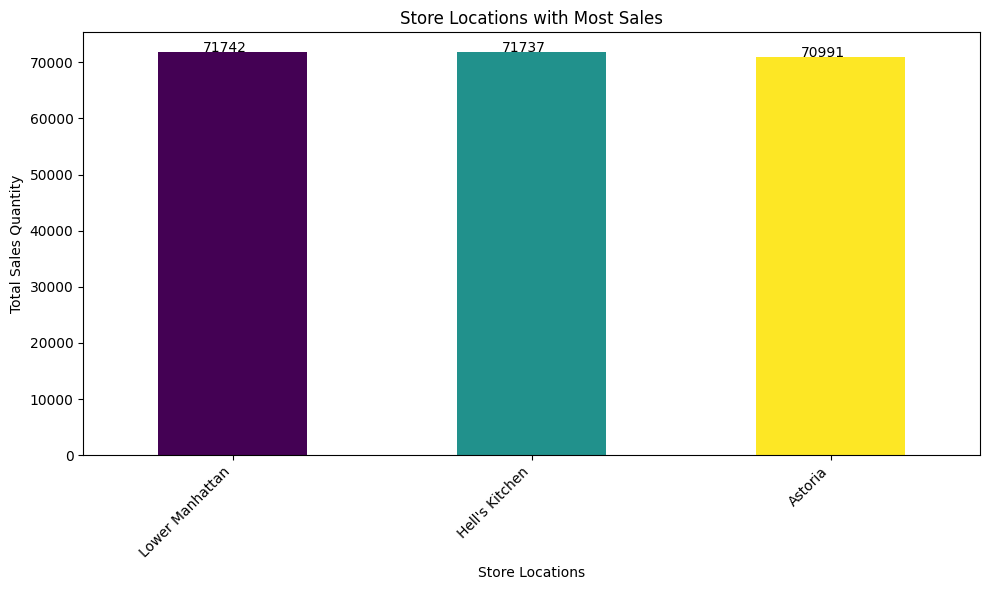

In [33]:
# Grouping by store location and summing the transaction quantities
store_sales = coffee.groupby('store_location')['transaction_qty'].sum().sort_values(ascending=False)

# Generating an array of different colors for each bar
colors = plt.cm.viridis(np.linspace(0, 1, len(store_sales)))

# Plotting a bar graph for store locations with most sales
plt.figure(figsize=(10, 6))
bars = store_sales.plot(kind='bar', color=colors)

# Adding count values at the end of each bar
for bar, count in zip(bars.patches, store_sales.values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.1, str(count), fontsize=10)

plt.title('Store Locations with Most Sales')
plt.xlabel('Store Locations')
plt.ylabel('Total Sales Quantity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

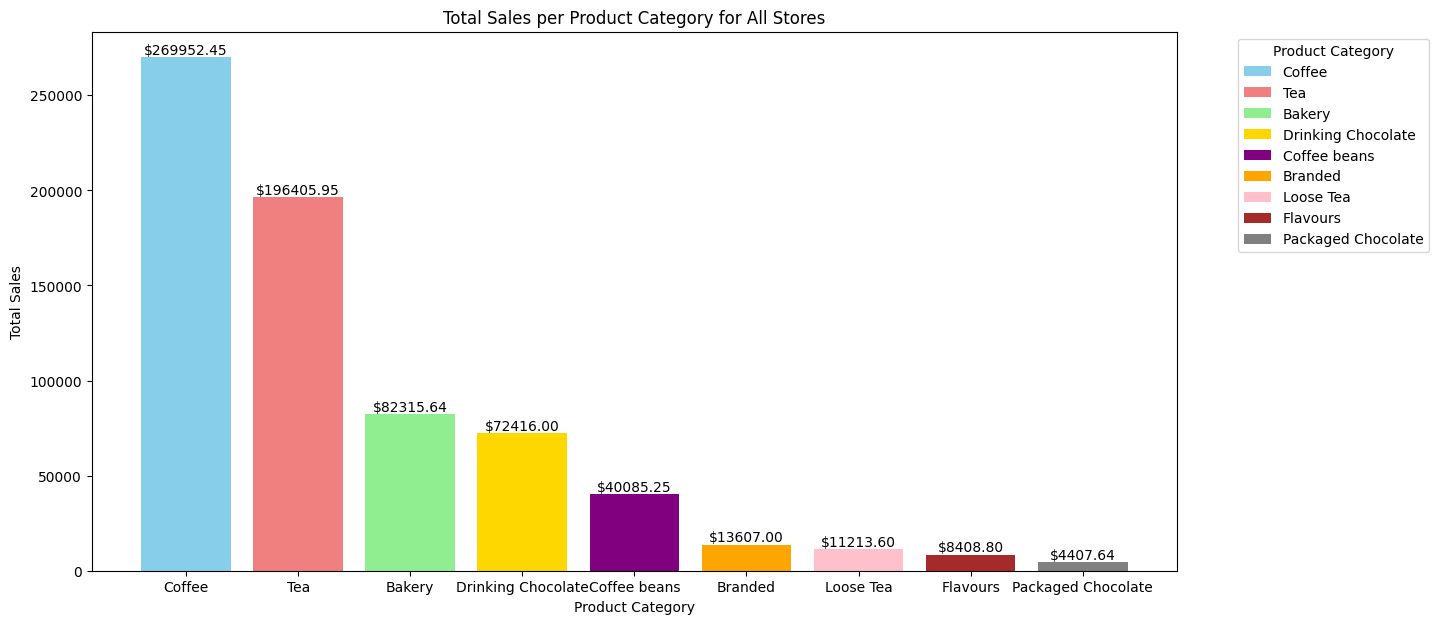

In [34]:
# Calculate total sales for each product category
coffee['total_sales'] = coffee['transaction_qty'] * coffee['unit_price']
total_sales_per_category = coffee.groupby('product_category')['total_sales'].sum()

# Sort values from highest to lowest
total_sales_per_category = total_sales_per_category.sort_values(ascending=False)

# Define colors for each category
colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold', 'purple', 'orange', 'pink', 'brown', 'gray']

# Set a larger plot size
plt.figure(figsize=(14, 7))  # Adjust the figure size here

# Plotting
bars = plt.bar(total_sales_per_category.index, total_sales_per_category.values, color=colors)
plt.title('Total Sales per Product Category for All Stores')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')

# Annotate each bar with its total sales value
for bar, value in zip(bars, total_sales_per_category):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 50, f'${value:.2f}', ha='center', va='bottom')

# Create a legend using handles
plt.legend(bars, total_sales_per_category.index, title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()



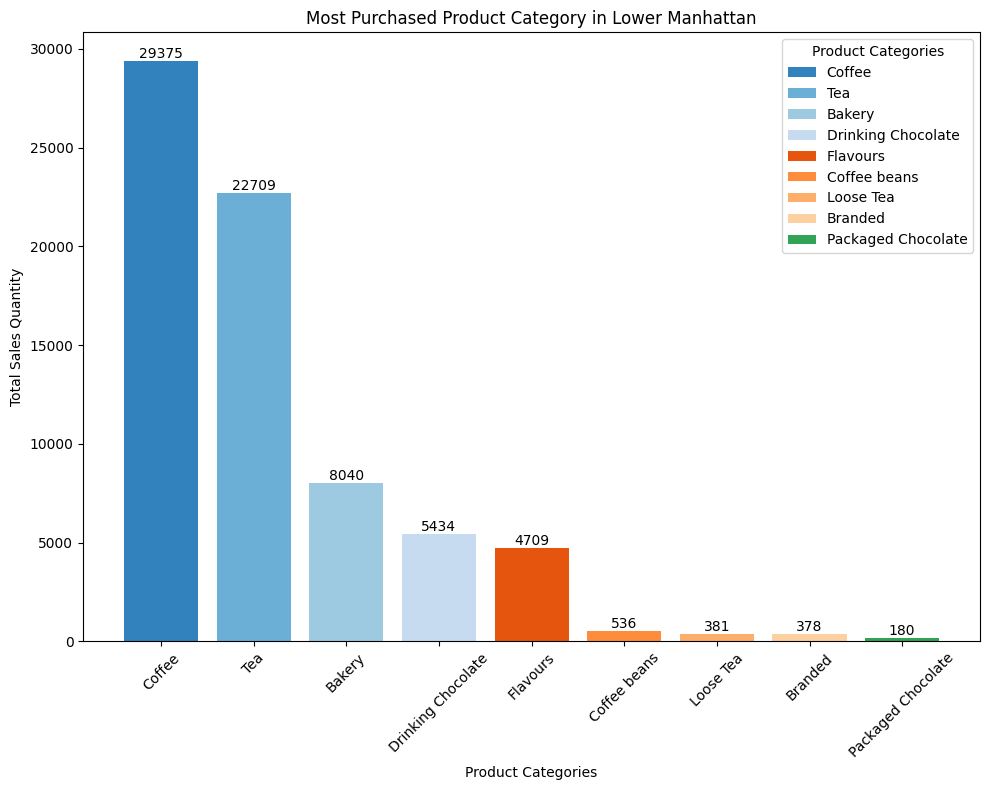

In [35]:
# Filtering data for 'Lower Manhattan' store location
lower_manhattan_data = coffee[coffee['store_location'] == 'Lower Manhattan']

# Finding the most purchased product category in 'Lower Manhattan'
most_purchased_category = lower_manhattan_data.groupby('product_category')['transaction_qty'].sum().idxmax()

# Grouping by product category and summing the transaction quantities, then sorting
category_sales = lower_manhattan_data.groupby('product_category')['transaction_qty'].sum().sort_values(ascending=False)

# Defining colors for each category
colors = plt.cm.tab20c(range(len(category_sales)))

# Plotting a vertical bar graph for most purchased product categories in 'Lower Manhattan' (from highest to lowest)
plt.figure(figsize=(10, 8))
bars = plt.bar(category_sales.index, category_sales.values, color=colors)

# Adding labels for each bar with the exact sales quantity
for bar, value in zip(bars, category_sales.values):
    plt.text(bar.get_x() + bar.get_width() / 2, value, str(value), ha='center', va='bottom')

plt.title('Most Purchased Product Category in Lower Manhattan')
plt.ylabel('Total Sales Quantity')
plt.xlabel('Product Categories')

plt.xticks(rotation=45)

# Adding legend for each product category
legend_labels = category_sales.index
plt.legend(bars, legend_labels, title='Product Categories')

plt.tight_layout()
plt.show()

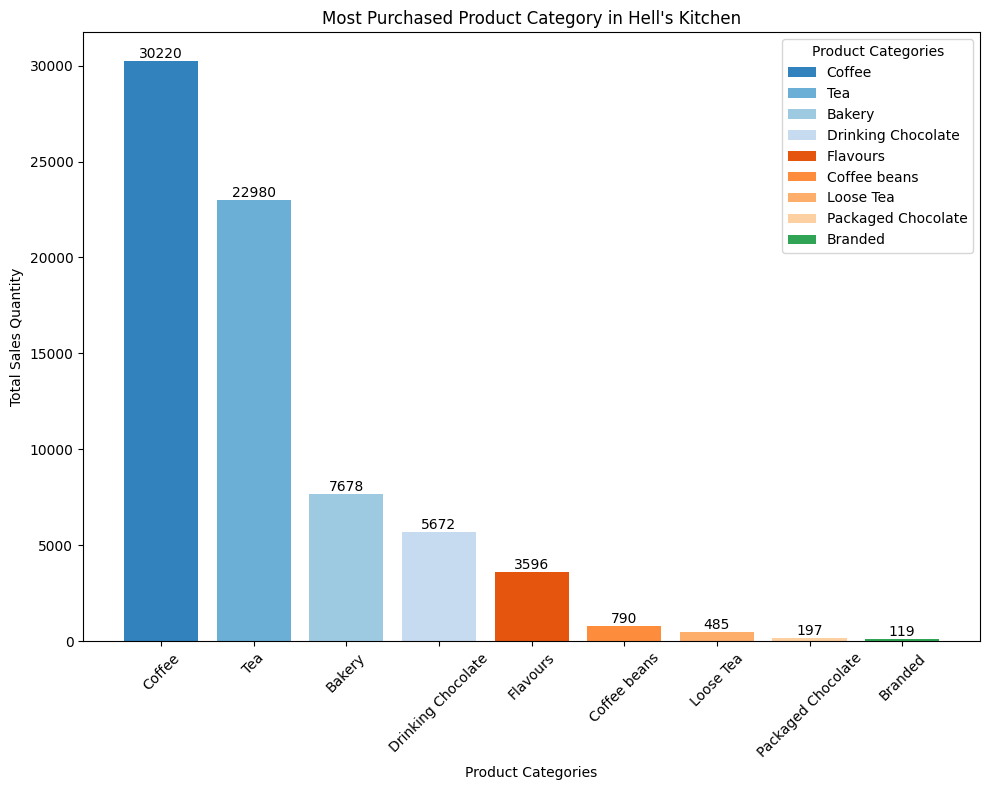

In [36]:
# Filtering data for 'Hell's Kitchen' store location
hell_kitchen_data = coffee[coffee['store_location'] == "Hell's Kitchen"]

# Finding the most purchased product category in 'Hell's Kitchen'
most_purchased_category_hell_kitchen = hell_kitchen_data.groupby('product_category')['transaction_qty'].sum().idxmax()

# Grouping by product category and summing the transaction quantities, then sorting
category_sales_hell_kitchen = hell_kitchen_data.groupby('product_category')['transaction_qty'].sum().sort_values(ascending=False)

# Defining colors for each category
colors_hell_kitchen = plt.cm.tab20c(range(len(category_sales_hell_kitchen)))

# Plotting a vertical bar graph for most purchased product categories in 'Hell's Kitchen' (from highest to lowest)
plt.figure(figsize=(10, 8))
bars_hell_kitchen = plt.bar(category_sales_hell_kitchen.index, category_sales_hell_kitchen.values, color=colors_hell_kitchen)

# Adding labels for each bar with the exact sales quantity
for bar, value in zip(bars_hell_kitchen, category_sales_hell_kitchen.values):
    plt.text(bar.get_x() + bar.get_width() / 2, value, str(value), ha='center', va='bottom')

plt.title('Most Purchased Product Category in Hell\'s Kitchen')
plt.ylabel('Total Sales Quantity')
plt.xlabel('Product Categories')

plt.xticks(rotation=45)

# Adding legend for each product category
legend_labels_hell_kitchen = category_sales_hell_kitchen.index
plt.legend(bars_hell_kitchen, legend_labels_hell_kitchen, title='Product Categories')

plt.tight_layout()
plt.show()

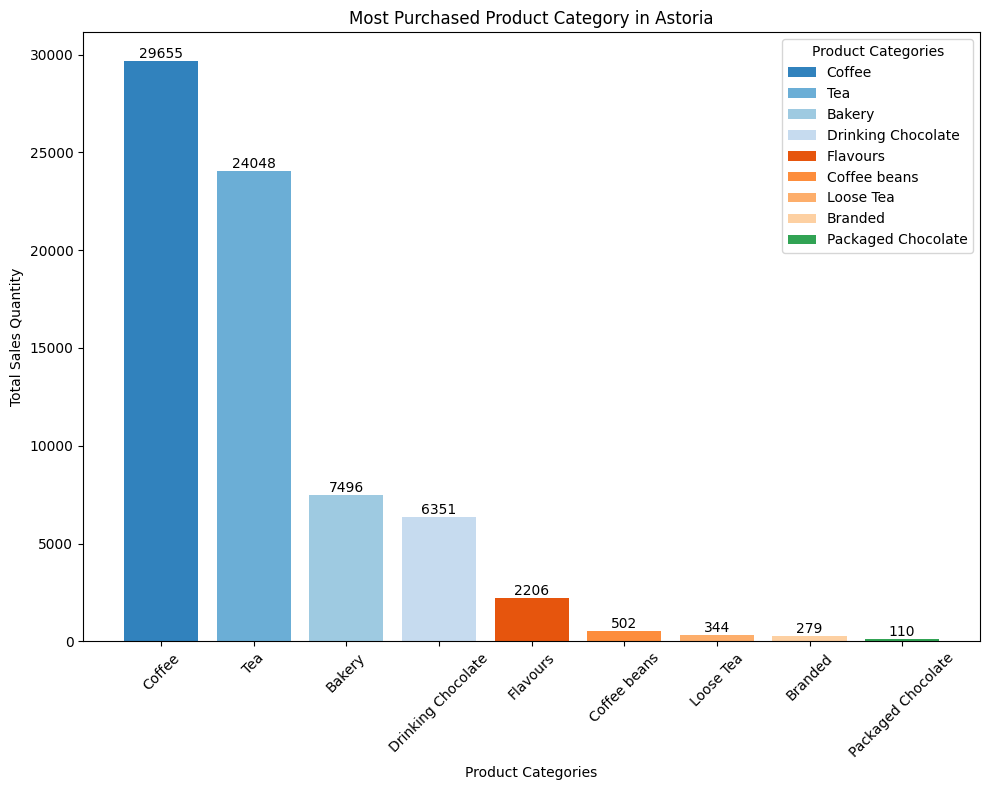

In [37]:
# Filtering data for 'Astoria' store location
astoria_data = coffee[coffee['store_location'] == 'Astoria']

# Finding the most purchased product category in 'Astoria'
most_purchased_category_astoria = astoria_data.groupby('product_category')['transaction_qty'].sum().idxmax()

# Grouping by product category and summing the transaction quantities, then sorting
category_sales_astoria = astoria_data.groupby('product_category')['transaction_qty'].sum().sort_values(ascending=False)

# Defining colors for each category
colors_astoria = plt.cm.tab20c(range(len(category_sales_astoria)))

# Plotting a vertical bar graph for most purchased product categories in 'Astoria' (from highest to lowest)
plt.figure(figsize=(10, 8))
bars_astoria = plt.bar(category_sales_astoria.index, category_sales_astoria.values, color=colors_astoria)

# Adding labels for each bar with the exact sales quantity
for bar, value in zip(bars_astoria, category_sales_astoria.values):
    plt.text(bar.get_x() + bar.get_width() / 2, value, str(value), ha='center', va='bottom')

plt.title('Most Purchased Product Category in Astoria')
plt.ylabel('Total Sales Quantity')
plt.xlabel('Product Categories')

plt.xticks(rotation=45)

# Adding legend for each product category
legend_labels_astoria = category_sales_astoria.index
plt.legend(bars_astoria, legend_labels_astoria, title='Product Categories')

plt.tight_layout()
plt.show()

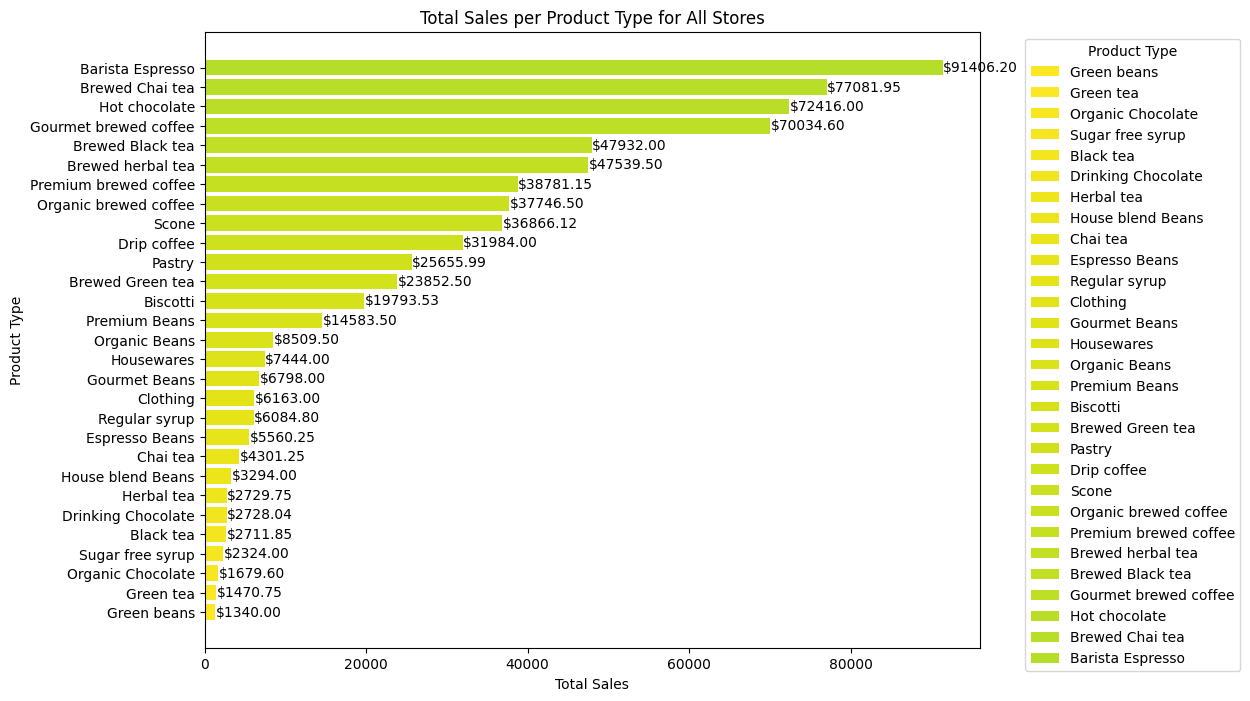

In [38]:
# Calculate total sales for each product type
coffee['total_sales'] = coffee['transaction_qty'] * coffee['unit_price']
total_sales_per_type = coffee.groupby('product_type')['total_sales'].sum()

# Sort values from highest to lowest
total_sales_per_type = total_sales_per_type.sort_values(ascending=True)

# Set a larger plot size
plt.figure(figsize=(10, 8))

# Define colors for each bar
colors = plt.cm.viridis_r(range(len(total_sales_per_type)))

# Plotting
bars = plt.barh(total_sales_per_type.index, total_sales_per_type.values, color=colors)
plt.title('Total Sales per Product Type for All Stores')
plt.xlabel('Total Sales')
plt.ylabel('Product Type')

# Annotate each bar with its total sales value
for bar, value in zip(bars, total_sales_per_type):
    plt.text(bar.get_width() + 50, bar.get_y() + bar.get_height()/2, f'${value:.2f}', ha='left', va='center')

# Add a full legend
plt.legend(bars, total_sales_per_type.index, title='Product Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

/tmp/ipykernel_33/1365671930.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lower_manhattan_data['total_sales'] = lower_manhattan_data['transaction_qty'] * lower_manhattan_data['unit_price']


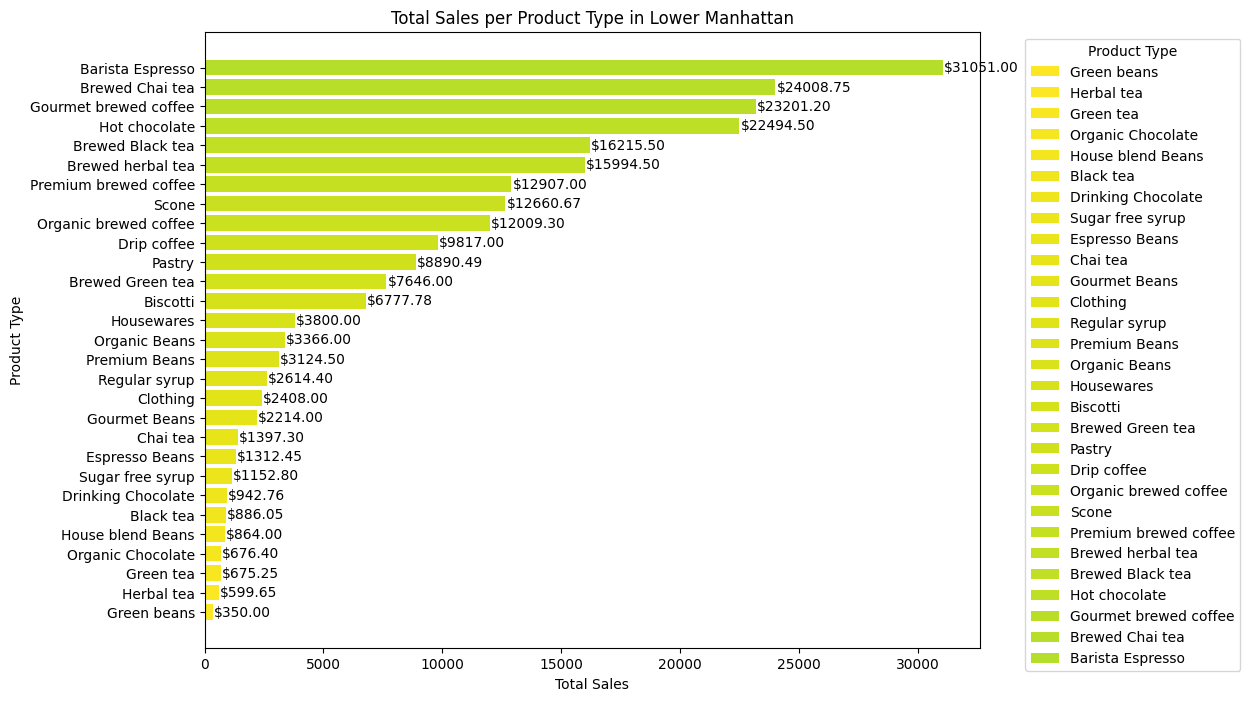

In [39]:
# Filter data for Lower Manhattan store location
lower_manhattan_data = coffee[coffee['store_location'] == 'Lower Manhattan']

# Calculate total sales for each product type in Lower Manhattan
lower_manhattan_data['total_sales'] = lower_manhattan_data['transaction_qty'] * lower_manhattan_data['unit_price']
total_sales_per_type_lower_manhattan = lower_manhattan_data.groupby('product_type')['total_sales'].sum()

# Sort values from highest to lowest
total_sales_per_type_lower_manhattan = total_sales_per_type_lower_manhattan.sort_values(ascending=True)

# Set a larger plot size
plt.figure(figsize=(10, 8))

# Define colors for each bar
colors = plt.cm.viridis_r(range(len(total_sales_per_type_lower_manhattan)))

# Plotting
bars = plt.barh(total_sales_per_type_lower_manhattan.index, total_sales_per_type_lower_manhattan.values, color=colors)
plt.title('Total Sales per Product Type in Lower Manhattan')
plt.xlabel('Total Sales')
plt.ylabel('Product Type')

# Annotate each bar with its total sales value
for bar, value in zip(bars, total_sales_per_type_lower_manhattan):
    plt.text(bar.get_width() + 50, bar.get_y() + bar.get_height()/2, f'${value:.2f}', ha='left', va='center')

# Add a full legend
plt.legend(bars, total_sales_per_type_lower_manhattan.index, title='Product Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

/tmp/ipykernel_33/2336047467.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hell_kitchen_data['total_sales'] = hell_kitchen_data['transaction_qty'] * hell_kitchen_data['unit_price']


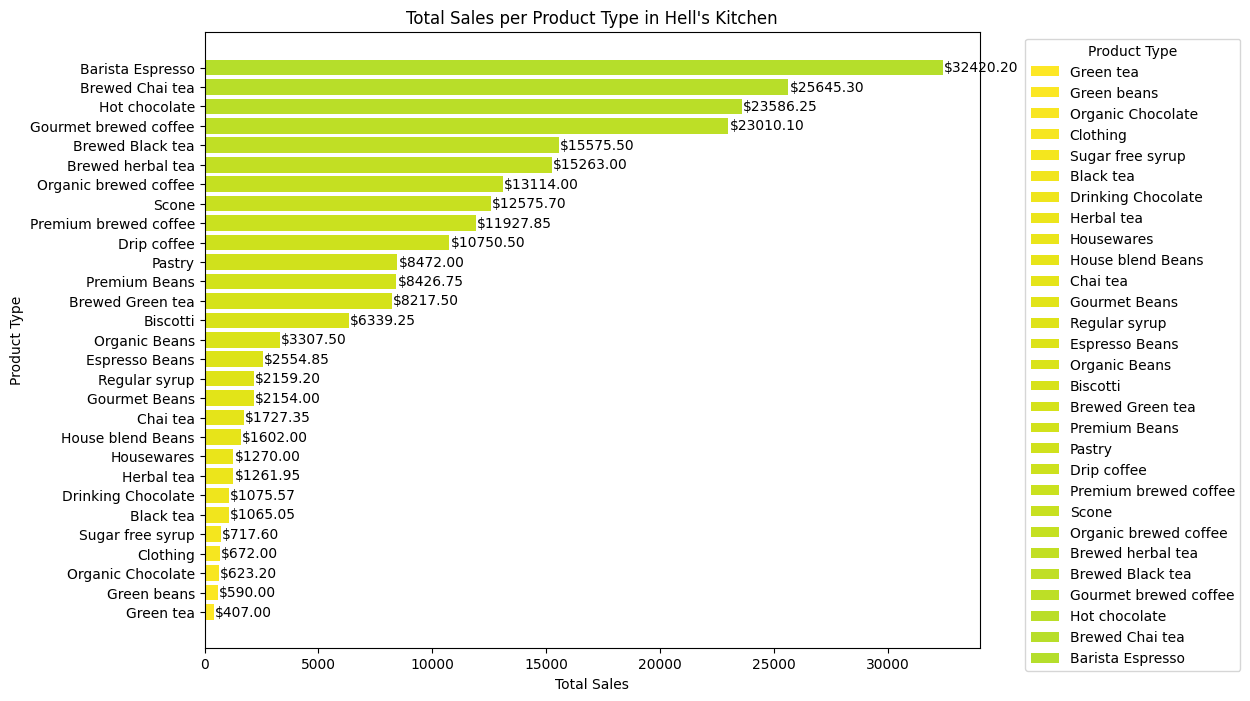

In [40]:
# Filter data for Hell's Kitchen store location
hell_kitchen_data = coffee[coffee['store_location'] == "Hell's Kitchen"]

# Calculate total sales for each product type in Hell's Kitchen
hell_kitchen_data['total_sales'] = hell_kitchen_data['transaction_qty'] * hell_kitchen_data['unit_price']
total_sales_per_type_hell_kitchen = hell_kitchen_data.groupby('product_type')['total_sales'].sum()

# Sort values from highest to lowest
total_sales_per_type_hell_kitchen = total_sales_per_type_hell_kitchen.sort_values(ascending=True)

# Set a larger plot size
plt.figure(figsize=(10, 8))

# Define colors for each bar
colors_hell_kitchen = plt.cm.viridis_r(range(len(total_sales_per_type_hell_kitchen)))

# Plotting
bars_hell_kitchen = plt.barh(total_sales_per_type_hell_kitchen.index, total_sales_per_type_hell_kitchen.values, color=colors_hell_kitchen)
plt.title("Total Sales per Product Type in Hell's Kitchen")
plt.xlabel('Total Sales')
plt.ylabel('Product Type')

# Annotate each bar with its total sales value
for bar, value in zip(bars_hell_kitchen, total_sales_per_type_hell_kitchen):
    plt.text(bar.get_width() + 50, bar.get_y() + bar.get_height()/2, f'${value:.2f}', ha='left', va='center')

# Add a full legend
plt.legend(bars_hell_kitchen, total_sales_per_type_hell_kitchen.index, title='Product Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

/tmp/ipykernel_33/2413515777.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  astoria_data['total_sales'] = astoria_data['transaction_qty'] * astoria_data['unit_price']


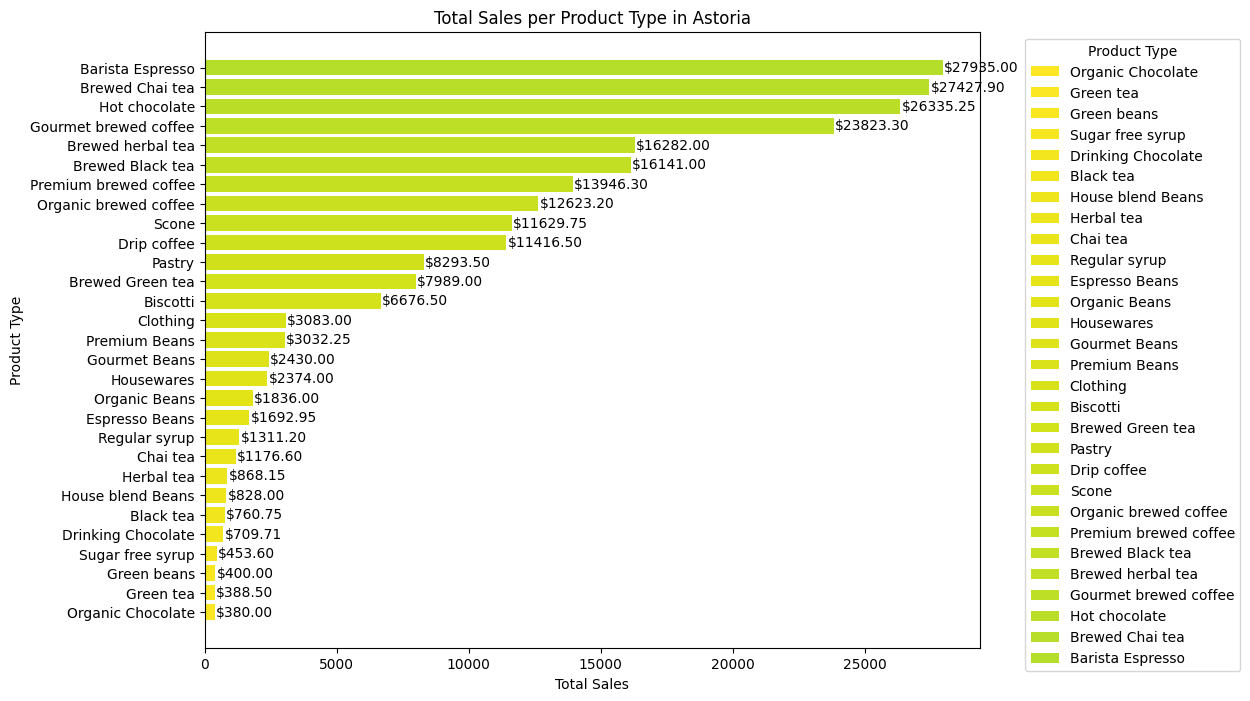

In [41]:
# Filter data for Astoria store location
astoria_data = coffee[coffee['store_location'] == 'Astoria']

# Calculate total sales for each product type in Astoria
astoria_data['total_sales'] = astoria_data['transaction_qty'] * astoria_data['unit_price']
total_sales_per_type_astoria = astoria_data.groupby('product_type')['total_sales'].sum()

# Sort values from highest to lowest
total_sales_per_type_astoria = total_sales_per_type_astoria.sort_values(ascending=True)

# Set a larger plot size
plt.figure(figsize=(10, 8))

# Define colors for each bar
colors_astoria = plt.cm.viridis_r(range(len(total_sales_per_type_astoria)))

# Plotting
bars_astoria = plt.barh(total_sales_per_type_astoria.index, total_sales_per_type_astoria.values, color=colors_astoria)
plt.title("Total Sales per Product Type in Astoria")
plt.xlabel('Total Sales')
plt.ylabel('Product Type')

# Annotate each bar with its total sales value
for bar, value in zip(bars_astoria, total_sales_per_type_astoria):
    plt.text(bar.get_width() + 50, bar.get_y() + bar.get_height()/2, f'${value:.2f}', ha='left', va='center')

# Add a full legend
plt.legend(bars_astoria, total_sales_per_type_astoria.index, title='Product Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

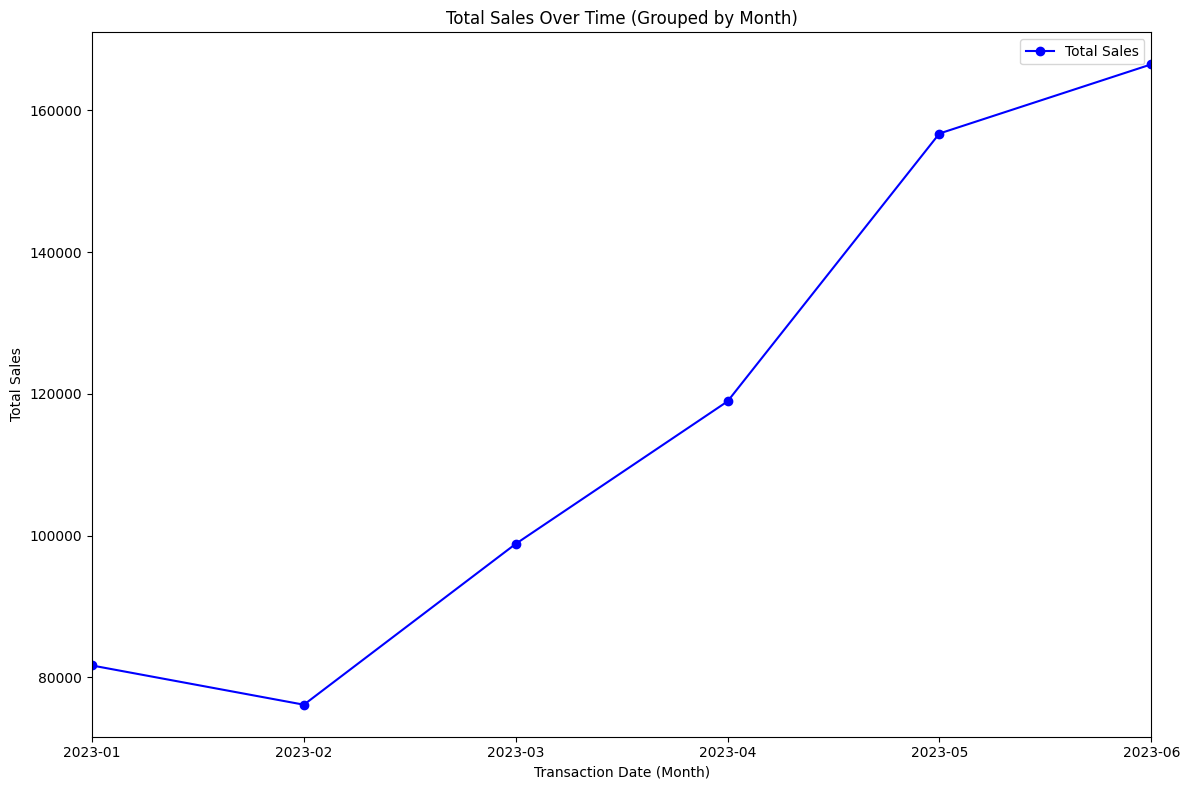

In [42]:
# Convert 'transaction_date' to datetime format
coffee['transaction_date'] = pd.to_datetime(coffee['transaction_date'])

# Group by month and sum total sales
total_sales_per_month = coffee.groupby(coffee['transaction_date'].dt.to_period('M'))['total_sales'].sum()

# Set a larger plot size
plt.figure(figsize=(12, 8))

# Plotting line graph
plt.plot(total_sales_per_month.index.astype(str), total_sales_per_month.values, label='Total Sales', color='blue', marker='o')

# Add labels and legend
plt.title('Total Sales Over Time (Grouped by Month)')
plt.xlabel('Transaction Date (Month)')
plt.ylabel('Total Sales')
plt.legend()

# Set x-axis limits to start from January
plt.xlim('2023-01', total_sales_per_month.index[-1].strftime('%Y-%m'))

plt.tight_layout()
plt.show()


In [43]:
import ipywidgets as widgets
from ipywidgets import interact

# Convert 'transaction_date' to datetime format
coffee['transaction_date'] = pd.to_datetime(coffee['transaction_date'])

# Group by month and day, and sum total sales
total_sales_per_day = coffee.groupby([coffee['transaction_date'].dt.to_period('M'), coffee['transaction_date'].dt.day])['total_sales'].sum().unstack()

# Function to plot total sales for a specific month
def plot_sales_by_month(month_index):
    plt.figure(figsize=(12, 8))
    
    # Plotting line graph for the selected month
    plt.plot(total_sales_per_day.columns, total_sales_per_day.loc[month_index], label=f'Total Sales - {month_index}', color='blue', marker='o')

    # Add labels and legend
    plt.title(f'Total Sales Over Days for {month_index}')
    plt.xlabel('Day')
    plt.ylabel('Total Sales')
    plt.legend()
    
    plt.show()

# Create a slider widget for selecting the month
month_slider = widgets.SelectionSlider(
    options=total_sales_per_day.index.to_timestamp().strftime('%Y-%m').unique(),
    value=total_sales_per_day.index.to_timestamp().strftime('%Y-%m').unique()[0],
    description='Select Month',
    continuous_update=False,
)

# Interactively call the function based on the slider value
interact(plot_sales_by_month, month_index=month_slider)


interactive(children=(SelectionSlider(continuous_update=False, description='Select Month', options=('2023-01',…

<function __main__.plot_sales_by_month(month_index)>

In [44]:
# Convert 'transaction_date' to datetime format
coffee['transaction_date'] = pd.to_datetime(coffee['transaction_date'])

# Group by store_location, month, and sum total sales
total_sales_per_store_month = coffee.groupby(['store_location', coffee['transaction_date'].dt.to_period('M')])['total_sales'].sum().unstack()

# Function to plot total sales for a specific store
def plot_sales_by_store(store_location):
    plt.figure(figsize=(12, 8))
    
    # Plotting line graph for the selected store
    plt.plot(total_sales_per_store_month.columns.astype(str), total_sales_per_store_month.loc[store_location], label=f'Total Sales - {store_location}', color='blue', marker='o')

    # Add labels and legend
    plt.title(f'Total Sales Over Months for {store_location}')
    plt.xlabel('Transaction Date (Month)')
    plt.ylabel('Total Sales')
    plt.legend()
    
    plt.show()

# Create a slider widget for selecting the store
store_slider = widgets.SelectionSlider(
    options=coffee['store_location'].unique(),
    value=coffee['store_location'].unique()[0],
    description='Select Store',
    continuous_update=False,
)

# Interactively call the function based on the slider values
interact(plot_sales_by_store, store_location=store_slider)


interactive(children=(SelectionSlider(continuous_update=False, description='Select Store', options=('Lower Man…

<function __main__.plot_sales_by_store(store_location)>

In [45]:
# Convert 'transaction_date' to datetime format
coffee['transaction_date'] = pd.to_datetime(coffee['transaction_date'])

# Group by store_location, month, and day, and sum total sales
total_sales_per_store_month_day = coffee.groupby(['store_location', coffee['transaction_date'].dt.to_period('M'), coffee['transaction_date'].dt.day])['total_sales'].sum().unstack(level=[0, 1])

# Function to plot total sales for a specific store and month
def plot_sales_by_store_and_month(store_location, month_index):
    plt.figure(figsize=(12, 8))
    
    # Plotting line graph for the selected store and month
    plt.plot(total_sales_per_store_month_day[store_location][month_index], label=f'Total Sales - {store_location} - {month_index}', color='blue', marker='o')

    # Add labels and legend
    plt.title(f'Total Sales Over Days for {store_location} - {month_index}')
    plt.xlabel('Day')
    plt.ylabel('Total Sales')
    plt.legend()
    
    plt.show()

# Create a slider widget for selecting the store
store_slider = widgets.SelectionSlider(
    options=coffee['store_location'].unique(),
    value=coffee['store_location'].unique()[0],
    description='Select Store',
    continuous_update=False,
)

# Get unique month values from the index
month_options = total_sales_per_store_month_day.columns.get_level_values(1).unique()

# Convert month values to strings
month_options_str = month_options.astype(str)

# Create a slider widget for selecting the month
month_slider_store = widgets.SelectionSlider(
    options=month_options_str,
    value=month_options_str[0],
    description='Select Month',
    continuous_update=False,
)

# Interactively call the function based on the slider values
interact(plot_sales_by_store_and_month, store_location=store_slider, month_index=month_slider_store)


interactive(children=(SelectionSlider(continuous_update=False, description='Select Store', options=('Lower Man…

<function __main__.plot_sales_by_store_and_month(store_location, month_index)>